<a href="https://colab.research.google.com/github/23f1000208/Physics-Inspired-Machine-Learning/blob/main/CH_2__Loss_Function_%26_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧭 How to Use This Notebook
* 🔽 **Work top-to-bottom.** Read the explanations, then run each code cell by clicking the play button ▶️
* 💡 **Don’t worry if you don’t understand everything immediately.** Machine learning takes practice!

# ✨ Loss Functions & Gradient Descent

## Abstract

Almost all machine learning and deep learning models are trained, i.e. their free parameters are set, by minimizing thier **loss function** using a numerical method called **Gradient Descent**.

🚀 By the end of this notebook, you will gain a deep insight of how loss functions are defined, and how Gradient Descent minimizes them.

In this course, we will:
- 🧪 Work hands‑on with the diabetes dataset to predict disease progression
- 🔁 Learn the full pipeline: data loading → exploratory data analysis (EDA) → preprocessing (scaling, collinearity, outlier handling) → feature/target split → model training → evaluation → interpretation
- 📐 Learn about Covariance, Correlation, Precision, and Partial Correlation matrices and how to use them for feature selection
- 🧠 Learn about the unified concept of loss function and how it reduces to RSS in linear regression  
- 🔍 Learn & observe how to minimize loss functions through both analytic and numeric methods  
- 📊 Use standard evaluation metrics (MSE, MAE, R²) and visualizations to assess model performance and diagnose problems





## 🛠️ Setup

In this course, we will use a few Python packages. Run the following cell to make sure they are installed.

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn scipy --quiet
!pip install --upgrade pingouin --quiet

---

## 📦 Imports

Let's also import all the packages that we need during the course.


In [ ]:
## print Python interpreter version
import sys
print(f"Python: {sys.version.split()[0]}")
## numerical computing
import numpy as np
## tabular data handling
import pandas as pd
## plotting
import matplotlib.pyplot as plt
## statistical visualizations
import seaborn as sns
## computing partial correlations
import pingouin as pg
## function to load the diabetes dataset
from sklearn.datasets import load_diabetes
## For computing multivariate Gaussian PDF
from scipy.stats import multivariate_normal
## utility to split data into train and test sets
from sklearn.model_selection import train_test_split
## evaluation metrics for linear regression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
)
## For reading online pages
import requests
## For displaying contents
from IPython.display import Markdown, display

Python: 3.11.14


In [ ]:
## set the color themes of the figures
style = requests.get("https://compu-flair.com/notes/jupyter-color-style/raw").text
exec(style)

---

## 📊 Data

In this course, we will work with the **Diabetes Patients** dataset and would like to use linear regression to predict their disease progression. We will discuss dataset's details later. For now, let's just load the data.

We will use the `load_diabetes` function from `sklearn.datasets` to load the dataset.

In [ ]:
## load the diabetes dataset
diabetes = load_diabetes()
## display the loaded dataset
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

## 📝 Explanation of the cell

Notice that the data object is a dictionary.
The 'data' key holds a numpy array. The shape indicates that it has 442 rows, each being a patient and 10 columns which are the features, or predictor variables.

The 'target' key is a 1-dimensional array holding the disease progression values that we would like to predict.

---

## 📚 Learn more about data

🔎 We always want to become as familiar with our data as possible.

The very first step is to find and read the metadata. In this example, the metadata comes with the `data` object under a key called `DESCR`.
Let's print it out.

**Specifically, we want to learn what the columns of dataset are (attribute information)**

In [ ]:
## print the metadata of the data object (describing the diabetes dataset)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## 🧾 Explanation of the printout above

* The target to be predicted is disease progression one year after the features are measured
* ℹ️ The "Attribute Information" gives the column names of the data and their explanations. For example, bp refers to average blood pressure.

---

## 🧮 Construct our spreadsheet

In machine learning, we always start with a table that holds our data. We call it dataframe. It holds all the features, also known as attributes or predictive variables, and the target that we would like to predict.

We will now build a DataFrame using the feature matrix `data` of the diabetes dictionary above.  
Also, we name the columns using the `feature_names` key in the same diabetes dictionary.

Next, we append the target as a separate column.

In [ ]:
## create a DataFrame from the numpy array of features, labeling columns with feature names
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target column
diabetes_df["disease_progression"] = diabetes.target


## 📋 The spreadsheet

Let's now take a look at our data table, i.e. the dataframe. 👀

In [ ]:
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


---

## ⚖️ Scaling (Normalization)

### Change of units:

Imagine measuring the mass of apples 🍎 and oranges 🍊 but recording the apples in kilogram and oranges in grams. **Doesn't that look absurd?**

📏 In physics, we always want to work with the same unit in an entire problem. Same is true here.
Since the columns of our dataset are different in nature, the only way to make the columns comparable is to convert them all to unit-less columns. This can be done by dividing each column by some property of that column. These include the mean, the median, max value, etc. The standard approach is to divide by the standard deviation.


### Centering:

📐 Perhaps you have seen change of coordinate system in physics and other places. Usually, we want to move to a frame of reference that makes calculations easier. In machine learning, one common change of coordinates, i.e. **columns of dataset**, is to use the mean of each column ($\bar x$) as the reference point. This means, we compute the mean of each column and subtract it from each component of that column.


### Scaling (unit change + centering)

Overall, we finally work with the following dataset:

$$
x \rightarrow \frac{x-\bar x}{\text{std}(x)}
$$

In [ ]:
## let's scale the dataset
df = (diabetes_df - diabetes_df.mean()) / diabetes_df.std()

---

## 📊 Basic Summary Statistics

Lets now print the basic summary statistics for all numeric columns in the DataFrame. The following command will compute count, mean, standard deviation, min, 25%, 50% (median), 75%, and max for each numeric column. 📈

This gives a quick view of central tendency, spread, ranges, and potential outliers, and lets you verify non-missing counts. ✅


In [ ]:
## Print basic summary statistics for all columns in the DataFrame
print(f"\nBasic statistics:")
print(df.describe())


Basic statistics:
                age           sex           bmi            bp          s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  442.000000   
mean   1.607563e-17  2.451533e-16  2.411344e-17 -8.037814e-18    0.000000   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00    1.000000   
min   -2.251738e+00 -9.374744e-01 -1.895781e+00 -2.360375e+00   -2.662394   
25%   -7.832846e-01 -9.374744e-01 -7.188104e-01 -7.697777e-01   -0.719205   
50%    1.130443e-01 -9.374744e-01 -1.529591e-01 -1.190789e-01   -0.090738   
75%    7.995940e-01  1.064282e+00  6.562083e-01  7.485196e-01    0.595518   
max    2.325260e+00  1.064282e+00  3.581660e+00  2.772916e+00    3.232188   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   8.037814e-18 -2.009453e-18  2.250588e-16  4.018907e-18 -5.224579e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1

## 📝 Explanation of the cell

You can see that as a result of the normalization above, all the means are nearly zero and all standard deviations are equal to one.

Also, the maximum and minimums of the columns are consequently small enough to avoid numerical errors.

---

## 🕵️‍♀️ Explore object types and missing values

Sometimes a column of dataframe is supposed to be real values ("float") but it is stored as "object". This means that column has an issue that you need to fix. ⚠️

Also, we need to see if any of the columns contain any missing values. If so, we need to somehow handle them. 🧩

Pandas dataframe info() function is the way to find out about these issues. ℹ️

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## 📝 Explanation of the cell

From the print out we can see that all the columns have the right type of float, meaning that they are stored as real numbers.
Also, non-null in front of all the columns means that no column does have a missing value.

Now that we understand there is no issue with our dataframe, we can move on to the next step.

---

## 🔍 Exploratory Data Analysis (EDA)

📊 Before building any machine learning model, we would like to observe distribution of the dataset columns. This will help us choose the right assumptions.

📉 Seaborn's pairplot function provides a squared-shaped group of sub-plots where the diagonal sub-plots are histograms of each column of dataset (their distributions) and off-diagonal sub-plots are two columns of dataset drawn on each of x-axis and y-axis, which shows their correlations.

🎯 Here, we would like to look for 1. correlations between columns and 2. outliers or unusual behaviors.

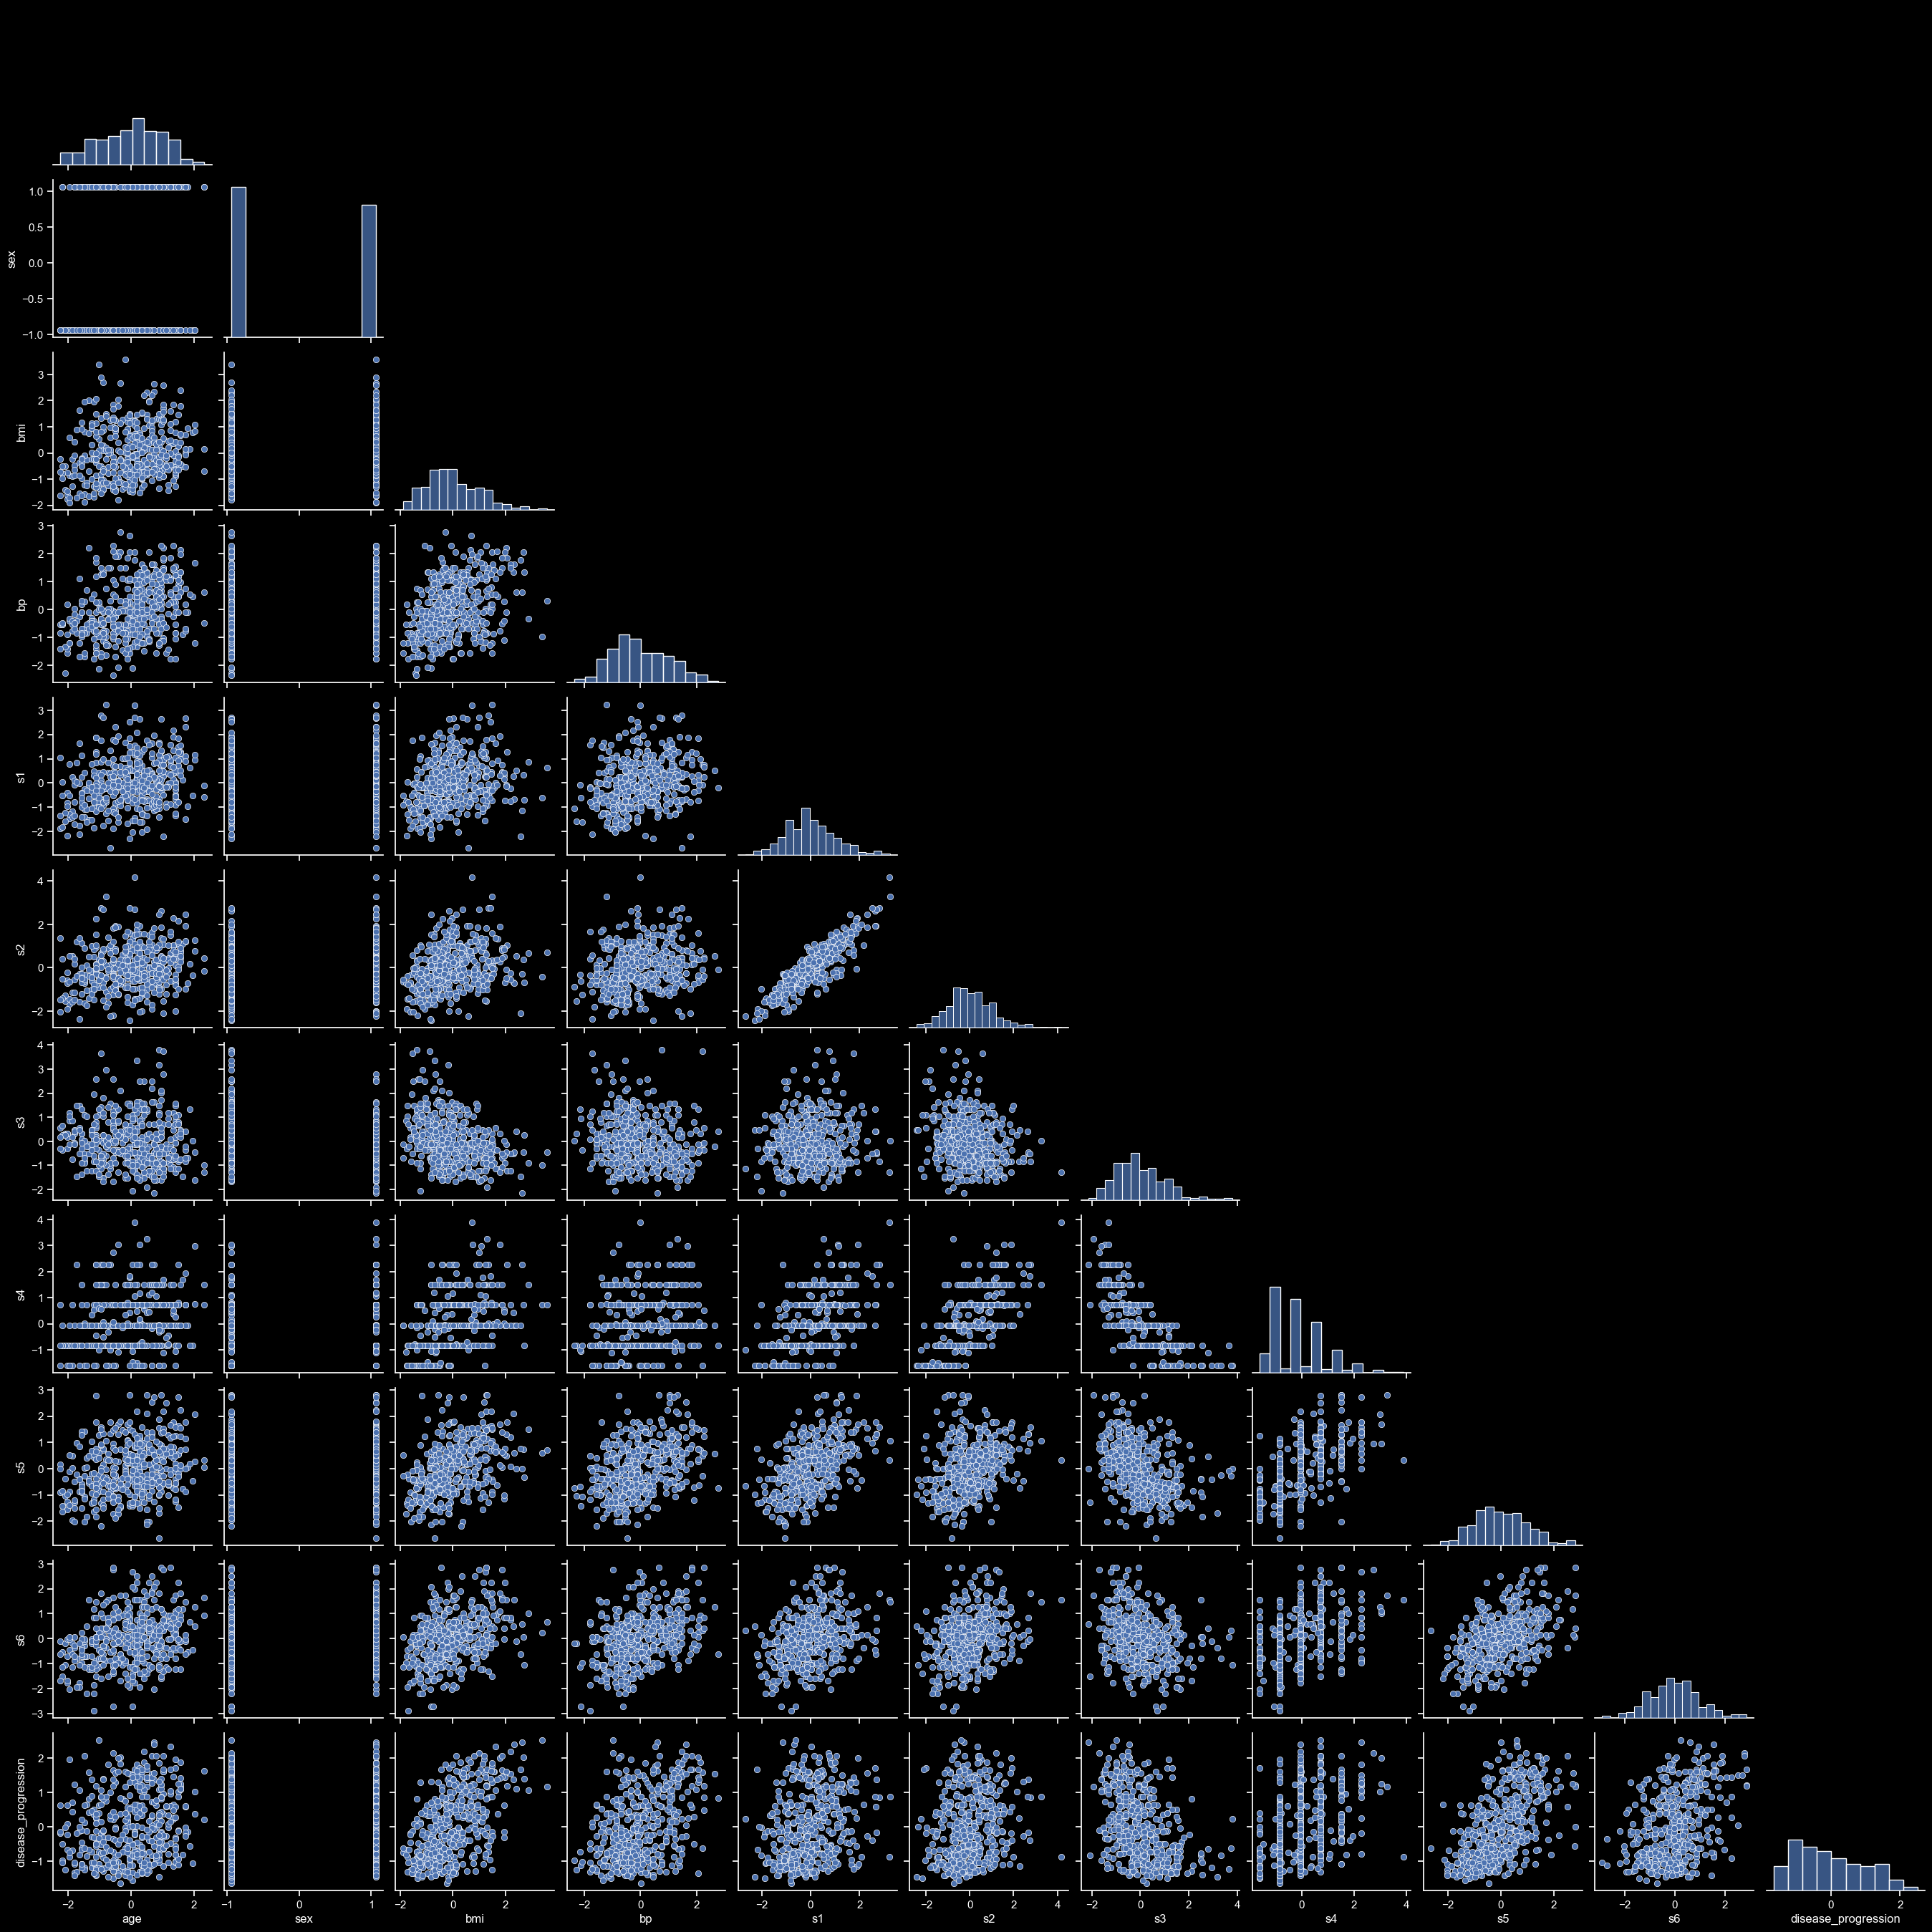

In [ ]:
## make the pair-plot of all the columns in the dataframe.
## We set corner=True to hide the upper right side which is identical to lower left
sns.pairplot(df, corner=True)

## 💡 Explanation of the pairplot

From this pairplot, I can see strong correlation between 's1' and 's2'.

Later you see why we need to keep only one of each correlated pair. ⚠️

Note: We don't want to remove correlations between the target column and the features. We only want to remove correlations between feature columns. 📝

---

## 🔢 **Covariance**, **Correlation**, **Precision**, and **Partial Correlation** Matrices

Pairplots are useful visualization that can help us figure out relationships between columns of our spreadsheet. However, they are very slow. 🐢 This will become a problem when the number of columns is high. We might need to wait hours for the plot to be created. ⏳

A more robust way to find relationships between columns of dataset is through the following matrices. 🧱


### **1. Covariance Matrix** 📉

We already worked with this matrix in the first course and saw that it's inverse shows up in probability of linear regression.
A **covariance matrix** ($\Sigma$) shows how different variables change *together*. 🤝

* Each diagonal value tells you how much a single variable varies (its variance). 📊
* Each off-diagonal value tells you whether two variables increase or decrease together (their covariance). 🔗

### **2. Correlation Matrix** 🔄

A **correlation matrix** is like a standardized version of the covariance matrix.
It shows how strong the relationship between variables is, on a scale from **–1 to 1**. 📏

* **+1** → perfectly increase together 📈
* **–1** → perfectly opposite behavior 📉
* **0** → no relationship 🤷

Because it is standardized, it is easier to interpret. ✅


We usually show the correlation matrix with $\rho$. Components of this matrix are related to the components of the covariance matrix through the following equation:
$$
\rho_{ij} = \frac{\Sigma_{ij}}{\sqrt{\Sigma_{ii}\Sigma_{jj}}}
$$



### **3. Precision Matrix** 🎯

The **precision matrix** is the inverse of the covariance matrix. In other words, as we saw in the first course, it is the matrix that appears in free energy of linear regression ($\Sigma^{-1}$).

Similar to the covariance matrix, its components tells us how variables relate, but with a key difference. It reveal **direct relationships** rather than overall co-movement. 🔍

To understand this, imagine we have 3 variables. If var1 affects var2 and var2 affects var3, then var1 and var3 are correlated. This will show up in the correlation matrix. However, var1 might have no direct impact on var3. We can find this out only through the precision matrix. 💡

### **4. Partial Correlation Matrix** 🧩

This is the standardized version of the precision matrix, on a scale from **–1 to 1**

$$
p_{ij} = -\,\frac{(\Sigma^{-1})_{ij}}{\sqrt{(\Sigma^{-1})_{ii}\,(\Sigma^{-1})_{jj}}}
$$


* **–1** → when one increases, the other decreases in a perfectly linear way ↘️
* **0** → no linear relationship between the variables 🚫
* **+1** → they increase or decrease together in a perfectly linear way ↗️


### Which one to use for feature selection? 🤔

The best of all is the **Partial Correlation Matrix** which shows direct relationships in a standard (and hence interpretable) way. The most important features are those that directly impact the target variable. ⭐

If two features **directly** influence each other, we need to drop one of them. ✂️


### Plot 🎨

We can easily plot these matrices using heatmaps. In a heatmap, we show the columns of spreadsheet on both x and y axes. Colors are used to represent the magnitude and sign of the components of the matrices. 🌈

In the following we plot both the correlation matrix and the partial correlation matrix. 👇

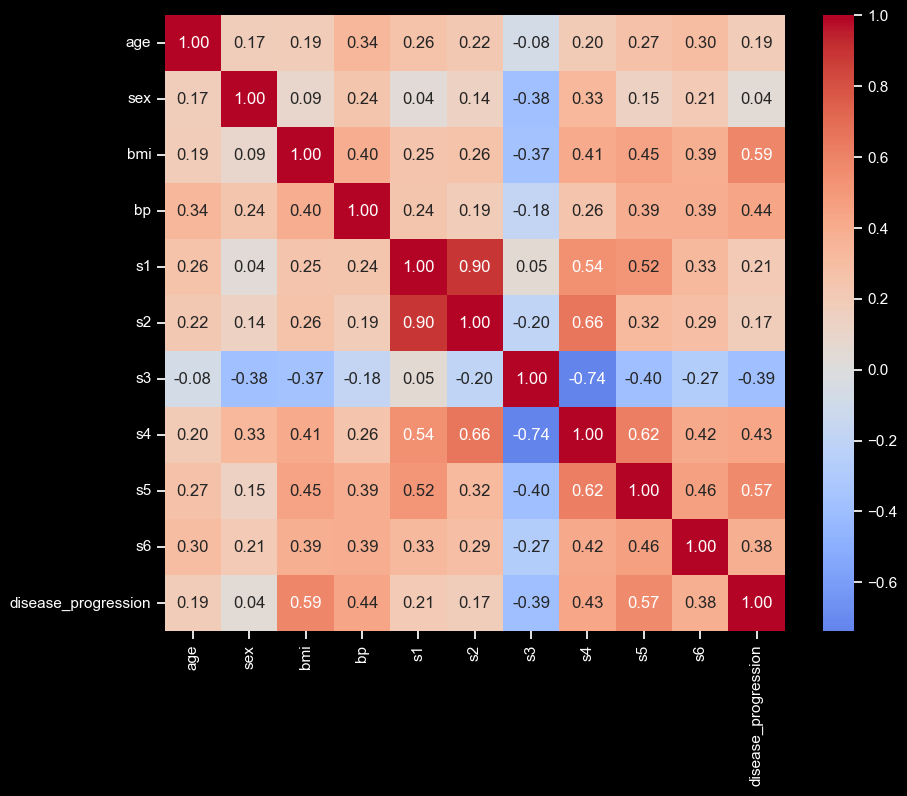

In [ ]:
## correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.show()  # render and display the plot in the notebook

## 📊 Interpretation of results

We can see that s1 and s2 are highly correlated. This is what we also observed in the pairplot. Additionally, this heatmap reveals correlations that are less obvious in the pairplot.

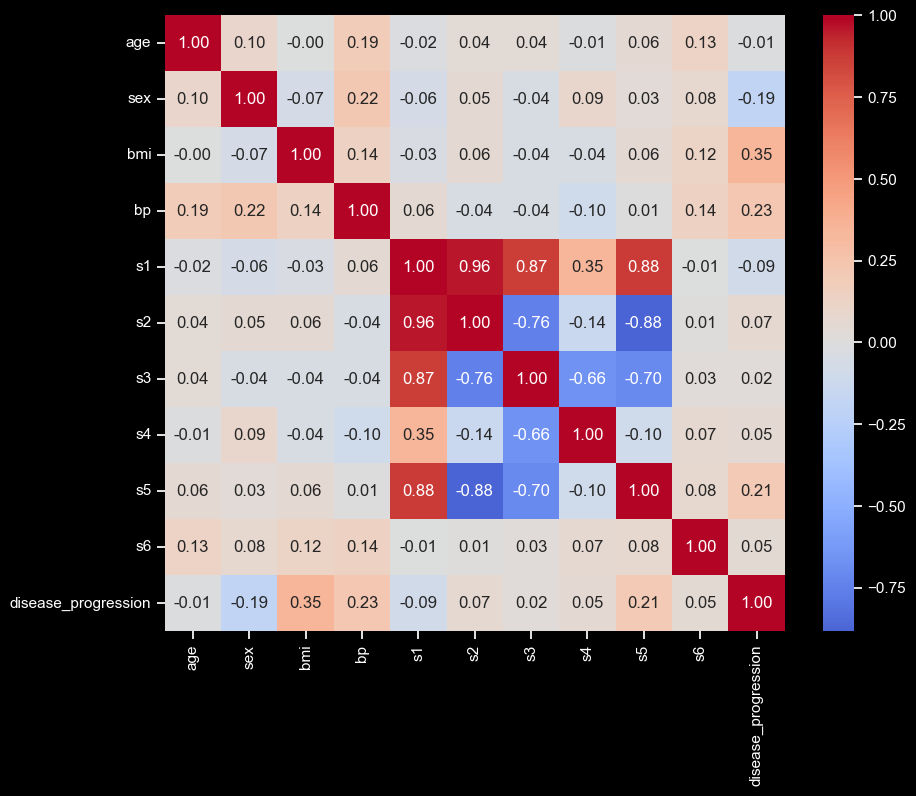

In [ ]:
## partial correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pg.pcorr(df), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.show()

## 📊 Interpretation of results

From the partial correlation we can see that s1 and s2 are directly highly correlated. This already suggests that we really need to drop one of them. We will see another more robust way, singularity analysis, to find which one to drop down below.

Also, looking at the last row of this matrix, we can see s5, bp, bmi, and sex are the features that are directly affecting the target (disease progression).

If we were to select only a few features for our linear regression, these would by our choices.

---


## 🎲 Probability of a dataset

### **✨ A unified approach to Machine Learning (& Physics)**

Just like in Physics, machine learning is a probability-based field.  
In machine learning, we **assume a dataset obeys a probability** of the following form:  
$$
P = \frac{e^{-F}}{Z}.
$$

Let me explain what this equation means. Both $P$ and $F$ are functions that take one row of the dataset. $P$ then spit out the probability for that row of dataset. In other words, if you measure the system (a diabetes patient| in this course) one more time, how likely it is to get that row.

In this equation $Z$ is a normalization constant named the **partition function**. We don't need to know its form in this course but if you are curious, here is the equation
$$
Z \; = \sum_{\text{all possible states}} e^{-F}
$$

Also, $F$ is called **effective free energy**. Below, I'll show you its form in linear regression.

### 🤔 How are machine learning models different?

* **They have different mathematical forms for $F$**
* Their approach to find $F$'s free parameters is different

We will get to these two bullets multiple times in future courses. For now just keep these two in mind and pass.

## 📉 $F$ in Linear Regression

In this course, we assume our dataset can be described by a **linear regression**. It means, we assume the following math form for $F$:

$$
F = -\frac{1}{2} (\vec{x} - \vec{\mu}) \cdot \Sigma^{-1} \cdot (\vec{x} - \vec{\mu})
$$
* 🧮 The corresponding probability is called the **Multivariate Gaussian Distribution.**
* 🎥 You don't need to but if curious, watch this [YouTube video](https://youtu.be/iqVeZ70muyw) to see how this can be derived from first principles.
* In this equation, $\vec{x}$ refers to the rows of dataset. In other words, the first component is the first feature of that row, the second component is the second feature, etc.
* $\vec{\mu}$ is a vector and $\Sigma$ is a matrix. The components of both of them are unknown. We need to estimate them using our dataset.  
* Later in this course, we will discuss how free parameters such as $\vec{\mu}$ and $\Sigma$ can be estimated using a dataset. 📚
* ✨ For now I just state them:
    * $\vec{\mu}$ = empirical mean of columns of dataset (each column corresponds to one component)
    * $\Sigma$ = empirical covariance matrix of dataset
    * Below, we use our data to compute and inspect $\vec{x}$, $\vec{\mu}$, and $\Sigma$.


### Let's look at components of $\vec{x}$ vector:

In [ ]:
# Iterate over the first 3 rows and display their values
for i in range(3):
    row_values = df.iloc[i].values
    print(f"x_{i}:\n {row_values}\n")

x_0:
 [ 0.79959404  1.06428249  1.29562034  0.4593201  -0.92869347 -0.73123602
 -0.91141776 -0.0544375   0.41805721 -0.37056863 -0.01470281]

x_1:
 [-0.03952235 -0.93747437 -1.08095529 -0.55287809 -0.17742321 -0.40243013
  1.56264285 -0.82936104 -1.43496249 -1.93628504 -1.00052508]

x_2:
 [ 1.79127703  1.06428249  0.93347548 -0.11907887 -0.95758848 -0.71808378
 -0.67947458 -0.0544375   0.0600875  -0.54453712 -0.14441627]



### Let's look at components of $\vec{\mu}$ vector:

In [ ]:
## mu vector
mu = np.mean(df, axis=0)
print(mu)

age                   -7.284269e-17
sex                    1.723106e-16
bmi                   -4.671979e-17
bp                    -7.284269e-17
s1                     5.023634e-19
s2                     5.475761e-17
s3                    -4.822688e-17
s4                     2.185281e-16
s5                    -7.736396e-17
s6                    -6.825862e-17
disease_progression   -1.567374e-16
dtype: float64


### Let's look at components of $\Sigma$ matrix:

In [ ]:
## covariance of dataset
Sigma = np.cov(df.T)
print(f"shape of Sigma: {Sigma.shape}")
print(f"number of columns of dataset: {len(df.columns)}")
print(Sigma)

shape of Sigma: (11, 11)
number of columns of dataset: 11
[[ 1.          0.1737371   0.18508467  0.33542759  0.26006082  0.21924314
  -0.07518097  0.2038409   0.27077424  0.30173101  0.18788875]
 [ 0.1737371   1.          0.0881614   0.24101049  0.03527682  0.14263726
  -0.37908963  0.33211509  0.14991614  0.20813322  0.043062  ]
 [ 0.18508467  0.0881614   1.          0.3954109   0.24977742  0.26116991
  -0.36681098  0.4138066   0.44615654  0.38867999  0.58645013]
 [ 0.33542759  0.24101049  0.3954109   1.          0.24246402  0.18554846
  -0.17876163  0.25765005  0.39348011  0.39043002  0.44148176]
 [ 0.26006082  0.03527682  0.24977742  0.24246402  1.          0.89666296
   0.05151936  0.54220728  0.51550292  0.32571675  0.21202248]
 [ 0.21924314  0.14263726  0.26116991  0.18554846  0.89666296  1.
  -0.19645512  0.65981689  0.31835667  0.29060038  0.17405359]
 [-0.07518097 -0.37908963 -0.36681098 -0.17876163  0.05151936 -0.19645512
   1.         -0.73849273 -0.39857729 -0.2736973  -0.3

---

## 🔬 Inverse of $\Sigma$:

⚠️ Since the inverse of $\Sigma$, i.e., the $\Sigma^{-1}$, appears in the probability of linear regression, it is important to make sure our matrix has an inverse.

🧮 Mathematically speaking, this means the matrix should not be singular.

### ❓ When is $\Sigma$ singular?

Usually, when the features have high direct correlations. And we spotted a few of them in the heatmap of the precision matrix above.

### 📖 What is this called conventionally?

In machine learning literature, this is often referred to as co-linearity. **Just remember the phrase.**

**As you can see, just stick to physics' fundamentals, and most problems will be avoided without you even noticing them.**

### 🔍 How to precisely find out if $\Sigma$ is singular?

Find eigenvalues and see if any is zero.

### ❓ But, what is an eigenvalue?

Think of $\Sigma$ matrix as a **machine** that, if we dot product it by any vector,  the vector undergoes a transformation, maybe rotates, stretches, or flips.

Now, most vectors will change both their **direction** and **length** after this transformation.

But there are some *special vectors* that **don’t change direction**, they only get longer or shorter.
These special vectors are called **eigenvectors** of $\Sigma$.

And how much they get stretched or squished is called their **eigenvalue**.


#### 🧮 In Math Form

If $ \vec{v} $ is one of those special vectors, then the transformed vector is proportional to the original:

$$
\Sigma \cdot \vec{v} = \lambda \vec{v}
$$

Here:
* $ \vec{v} $ → the eigenvector (the direction that doesn’t rotate)
* $ \lambda $ → the eigenvalue (the stretch or squish factor)


#### 💡 What is singularity in this sense?

If $\lambda$ is zero, $\Sigma \cdot \vec{v}$ will not change the vector normally, it make the vector disappear (flatten it to zero).


In [ ]:
## Eigenvalues of Sigma
eigvals = np.real_if_close(np.linalg.eigvals(Sigma))
for name, val in zip(df.columns, eigvals):
    print(f"{name}: {val:.3g}")

age: 4.4
sex: 1.56
bmi: 1.26
bp: 1.09
s1: 0.00849
s2: 0.0783
s3: 0.342
s4: 0.662
s5: 0.614
s6: 0.436
disease_progression: 0.544


## 💡 Interpretation of the results

As you see above, one of the eigenvalues are very small compared to the rest. And that belongs to 's1' that we already observed to have a high correlation with 's2' 🔍

### ✂️ Feature Selection
**So, we need to drop 's1'!**

In the following, we drop one column with a very low eigenvalue (almost zero), and recompute Sigma, then evaluate eigenvalues of the new Sigma and inspect again. We continue until all eigenvalues are relatively large

In [ ]:
## Define a function to drop columns of dataframe
def Drop_column_and_reevaluate(df, column_names):
    """
    Drop one or more columns from a DataFrame and re-evaluate collinearity.

    Parameters
    ----------
    df : pandas.DataFrame
        Input dataframe containing numeric columns (typically standardized).
    column_names : str or list-like
        Column name or list of column names to drop from the dataframe.

    Returns
    -------
    pandas.DataFrame
        A new DataFrame with the specified columns removed.
    """
    df_filter = df.drop(columns=column_names)
    Sigma = np.cov(df_filter.T)
    print(f"shape of Sigma: {Sigma.shape}")
    print(f"number of columns of dataset: {len(df_filter.columns)}")
    ## Eigenvalues of Sigma
    eigvals = np.real_if_close(np.linalg.eigvals(Sigma))
    for name, val in zip(df_filter.columns, eigvals):
        print(f"{name}: {val:.3g}")
    return df_filter

In [ ]:
## drop 'AveBedrms' column and re-evaluate eignevalues of the smaller dataset
df_1 = Drop_column_and_reevaluate(df, ["s1"])

shape of Sigma: (10, 10)
number of columns of dataset: 10
age: 4.06
sex: 1.27
bmi: 0.078
bp: 1.1
s2: 0.964
s3: 0.342
s4: 0.414
s5: 0.531
s6: 0.636
disease_progression: 0.611


## 📊 Interpretation of results

By now we have removed the singularity of the inverse covariance matrix and all the eigenvalues seem to have the same order of magnitude. Therefore, we keep this as our final dataset.


### Why don't we need further feature selection?

In general feature selection is needed when features contradict the definition of your model or when the number of samples (rows) in our spreadsheet is low comparing with the number of features.

In this course, by removing the singularity, we already solved the contradiction with linear regression model. Also, the number of features (10) is low enough relative to the number of samples (442). So, even if some features are not relevant, we have enough sample to train linear regression and figure that out through training.

---


## ✅ Final dataset

Let's now redefine df to hold the final dataset 🎉

In [ ]:
df = df_1

## take a look at the first 5 rows
df.head()

,age,sex,bmi,bp,s2,s3,s4,s5,s6,disease_progression
0,0.799594,1.064282,1.295620,0.459320,-0.731236,-0.911418,-0.054438,0.418057,-0.370569,-0.014703
1,-0.039522,-0.937474,-1.080955,-0.552878,-0.402430,1.562643,-0.829361,-1.434962,-1.936285,-1.000525
2,1.791277,1.064282,0.933475,-0.119079,-0.718084,-0.679475,-0.054438,0.060087,-0.544537,-0.144416
3,-1.870322,-0.937474,-0.243495,-0.769778,0.524802,-0.756789,0.720486,0.476443,-0.196600,0.698721
4,0.113044,-0.937474,-0.764079,0.459320,0.327519,0.170984,-0.054438,-0.671740,-0.979458,-0.222244


## 🔍 Explore new dataset one more time

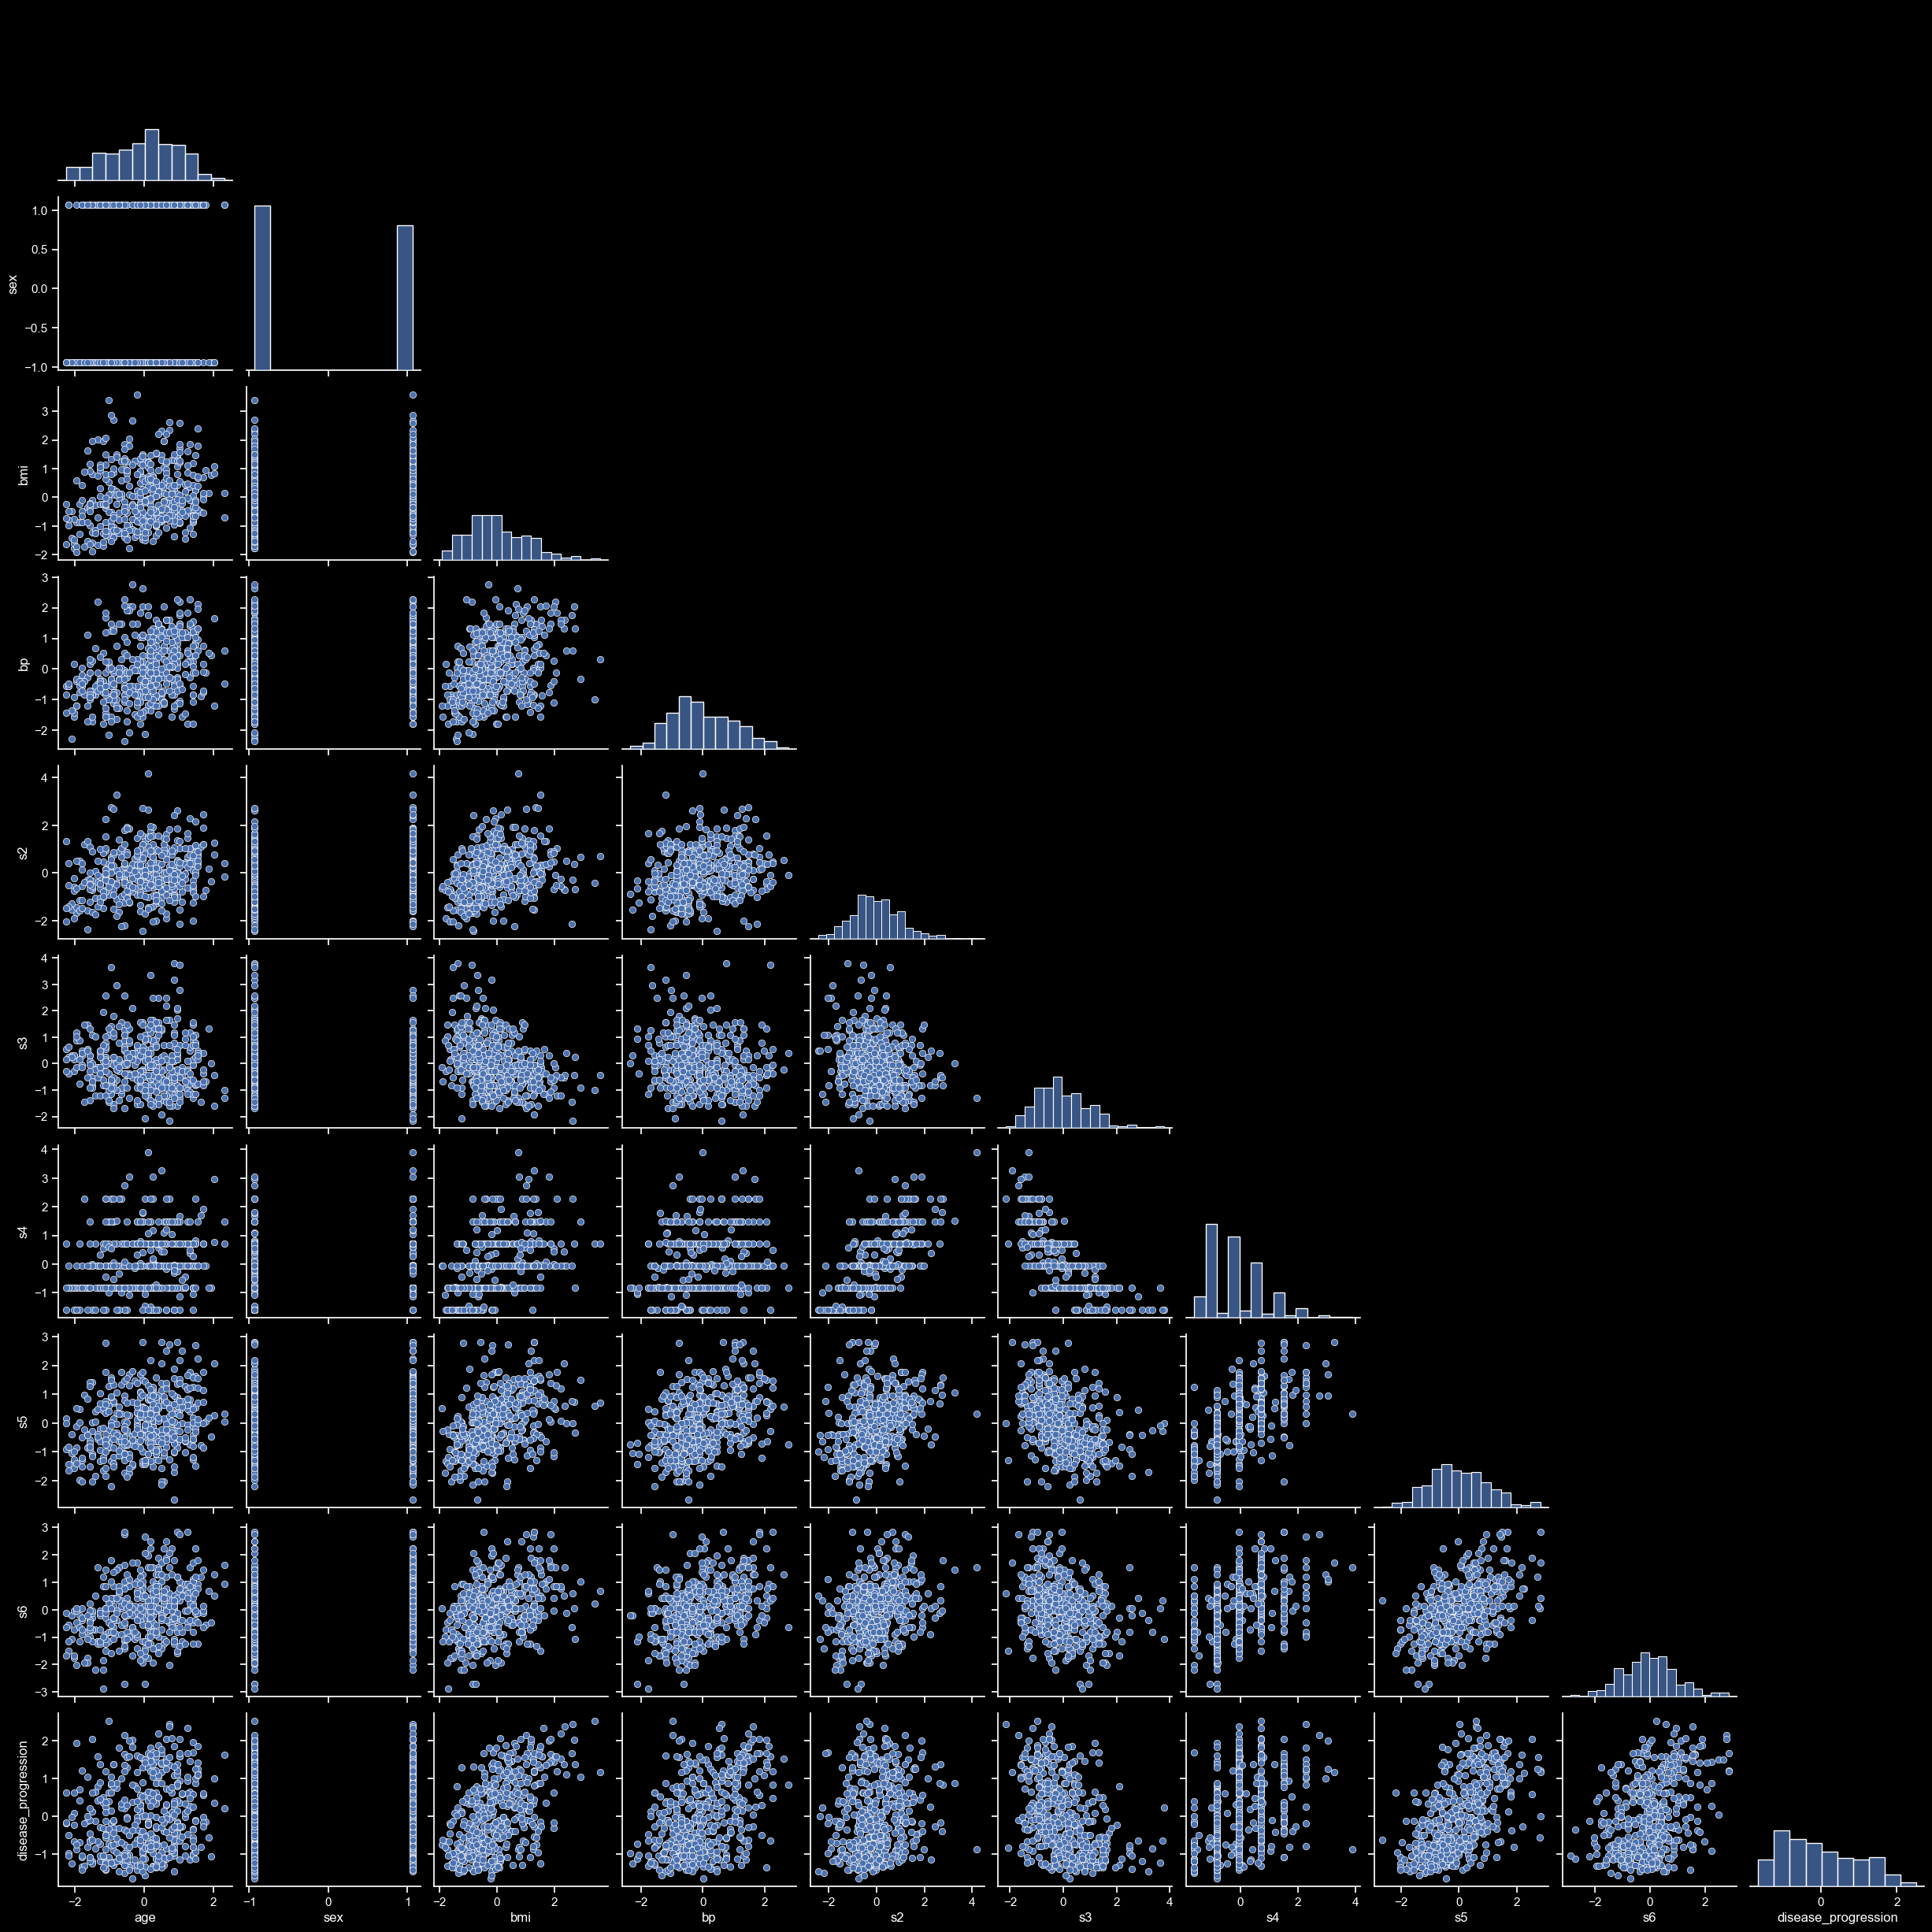

In [ ]:
sns.pairplot(df, corner=True)

## 📊 Interpretation of results

We see that the very high correlations are gone. Also, we don't see unusual behaviors (outliers) in these plots.

So, we can skip the outlier handling step. Also, since no row is dropped since our last normalization of the dataset, we do not need a second normalization.

---

## 🎲 Probability of the final dataset


After selecting features and removing outliers, we always need to recompute the parameters of the probability distribution of our dataset.

In [ ]:
## mu vector
mu = np.mean(df, axis=0)

## covariance of dataset
Sigma = np.cov(df.T)

### 🎲 Dataset's probability

Let's now insert the optimal values of $\vec{\mu}$ and $\Sigma$ into
$$
F = -\frac{1}{2} (\vec{x} - \vec{\mu}) \cdot \Sigma^{-1} \cdot (\vec{x} - \vec{\mu})
$$
and construct the probability distribution, i.e. the pdf, of our final dataset
$$
P = \frac{e^{-F}}{Z}
$$


In [ ]:
## Probability distribution (PDF) of multivariate Guassian (normal)
pdf = multivariate_normal(mean=mu, cov=Sigma).pdf

### 📊 Probability of rows of dataset

**If you take a row of your dataset and insert into $P$, it will tell you the chance of that row happening again.**

In [ ]:
## Print PDF (probability density) for the first 3 rows of the dataframe
for irow in range(3):
    # evaluate the multivariate normal PDF for row i (convert to 1D array with .values)
    x_vec = df.iloc[irow].values
    pdf_value = pdf(x_vec)
    print(f"Row {irow}:\nx-vector:{x_vec}\nPDF: {pdf_value:.2e}\n")

Row 0:
x-vector:[ 0.79959404  1.06428249  1.29562034  0.4593201  -0.73123602 -0.91141776
 -0.0544375   0.41805721 -0.37056863 -0.01470281]
PDF: 2.29e-05

Row 1:
x-vector:[-0.03952235 -0.93747437 -1.08095529 -0.55287809 -0.40243013  1.56264285
 -0.82936104 -1.43496249 -1.93628504 -1.00052508]
PDF: 1.22e-05

Row 2:
x-vector:[ 1.79127703  1.06428249  0.93347548 -0.11907887 -0.71808378 -0.67947458
 -0.0544375   0.0600875  -0.54453712 -0.14441627]
PDF: 8.71e-06



---

## 🤖 Connecting to Machine Learning

Let's define two new variables
* $\vec{X}$: this is the vector $\vec{x}$ without the target column
* $y$: this is the target column of vector $\vec{x}$


### 🎯 Goal of linear regression
Linear regression is a supervised machine learning. That means, we will be given the values of the features, $\vec{X}$, and we need to predict the value of the target $y$

### ✂️ Split dataset to features and target
So we would like to split columns of our dataframe to $\vec{X}$ and $y$:

In [ ]:
# Target column's name
target_col = "disease_progression"

# Extract the features matrix
X = df.drop(columns=[target_col]).values

# Extract the target variable
y = df[target_col].values

---

## 🔮 Predictive power of the probability distribution

Now things get interesting. We would like to plot for each row of dataset, the probability distribution of $y$ when the $\vec{X}$ is given.

We create a grid of y values. This ideally should be minus infinity to infinity. But, since probability is zero in extreme ranges, we keep the range shorter.

We then plot the probability for every value of y in this grid, keeping the $\vec{X}$ values as the given ones in that row.

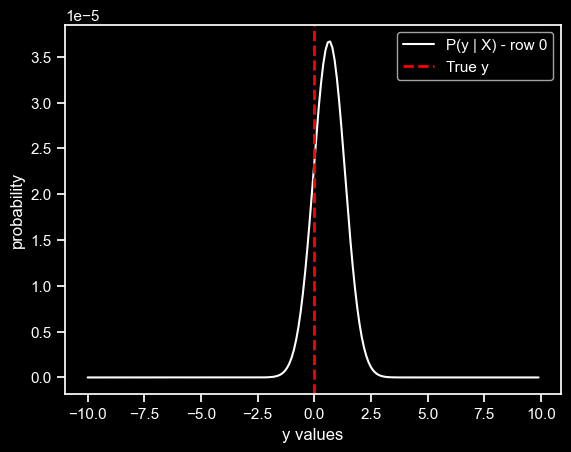

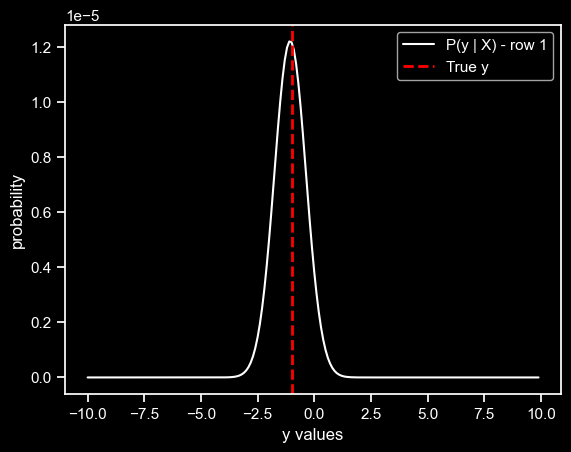

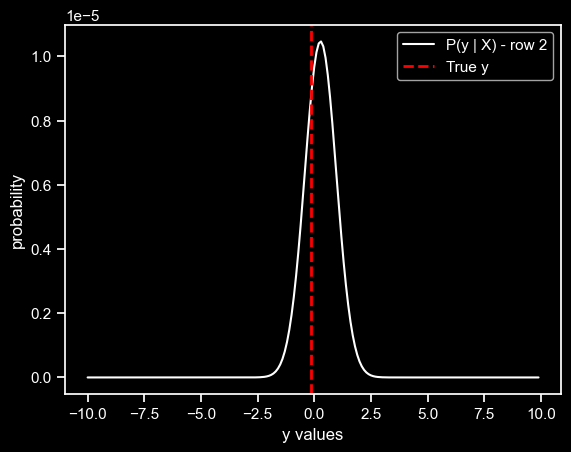

In [ ]:
## A function that takes the row index, replace its true y with the given y and
## return the probability of the the resulting x-vector
@np.vectorize
def p_y(irow, y_val):
    ## Concatenate the feature vector for the given row with the give y value
    return pdf(np.concatenate([X[irow, :], np.array([y_val])]))


## y-grid over which we will evaluate the p_y function above
y_grid = np.arange(-10, 10, 0.1)

## Plot PDF curves for a few rows
for irow in range(3):
    ## plot p_y
    plt.plot(y_grid, p_y(irow, y_grid), "white", label=f"P(y | X) - row {irow}")
    ## draw vertical line at the true y
    plt.axvline(x=y[irow], linestyle="--", linewidth=2, color="red", label="True y")
    plt.xlabel("y values")
    plt.ylabel("probability")
    plt.legend()
    plt.show()

## 💡 Interpretation of results

Our probability function seems to have a prediction power. The vertical red lines showing the true y values are always very close to the peak of the drawn probabilities.
Let's assume we are given a test feature set $\vec{X}$ whose true value is not known. We can make a similar plot, and take the location of the peak as the predicted value for the target $y$.

Note: We know that these peaks are the means of the distributions. These distributions are actually directly proportional with what we call the conditional probabilities of each row.

### 🌐 The Unified View

🔍 In all machine learning models, we need to find $F$.
📈 Once we have it, we can use it (as in the plots above) to make predictions.

🧩 That means we only need to ask one question in any machine learning problem:

**How to find the optimal form of $F$ using data?**

## 🎲 Conditional Probability

The supervised nature of linear regression requires a conditional probability. 🧐
In other words, we need the probability of $y$ under the condition that the values of $\vec{X}$ are given to us.


Here is the definition of conditional probability:
$$
P(y \mid X) = \frac{P(X, y)}{\int dy \, P(X, y)} = \frac{e^{-F}}{Z\int dy \, \frac{e^{-F}}{Z}} = \frac{e^{-F}}{\int dy \, e^{-F}}
$$
Note that in this equation $\vec{X}$ is not variable, the values are given. Therefore, the denominator is just a constant, the normalization constant of conditional probability, 🧱
$$
Z_c \equiv \int dy \, e^{-F}
$$

Computing this integral will be a bit cumbersome. However, there is a nice trick that we used above 🪄
$$
P(y \mid X) = \frac{e^{-F}}{Z_c}
$$
In other words, the conditional probability differs from the probability of the dataset (the joint probability) by just a constant. As a result, the shape of the distribution, including the location of the peaks, is what you see in the plots above. 🏔️

## 📈 **Prediction in linear regression**

As we saw in the plots above, the expected (average) value of $ y $ given $ X $ gives our prediction: 🔮
$$
\hat{y} = \mathbb{E}[y \mid X] = \int dy \, y \, P(y \mid X)
$$
The hat is to distinguish the predicted y from the true y. 🎩

Performing the integration gives:
$$
\hat{y} = \beta_0 + \vec{\beta} \cdot \vec{X}
$$
This is what we know as the **linear regression equation**. In this equation: 📏
- $ \beta_0 $: intercept
- $ \beta_i $: coefficients showing how much each feature influences the prediction

Although not needed, if the integral is worked out, $(\beta_0,\, \vec{\beta})$ will be expressed in terms of $(\vec{\mu},\, \Sigma)$.
**This will be training the model the hard way!** 😓 We will discuss it below in this course. 🔜

---

## ⚙️ Training the Model (The Unified View)

🎯 The goal of training a machine learning model is to find the optimal values of its free parameters. In linear regression this would be $ \beta_0, \beta_1, \dots, \beta_n $. In neural networks it would be the weights of the neural nets. **But, how exactly should we do that?** 🤔

In all models of machine learning and also in physics we believe the system under study has an optimal behavior in which the cost of performing that behavior is minimal. 📉


### Unified Optimal Behavior in Physics 🌌
In physics this is called **the principle of least action**.
This principle governs the entire physics. Motion of pendulum, motion of planets, expansion of the universe, the electromagnetic force, the weak and strong forces that usually show up in nuclear reactions, Einstein's description of gravitational force, all obey this principle. ⚛️

Mathematically speaking, all these systems behave such that the action defined as the time integral of Lagrangian $L$
$$
S = \int L\,dt
$$
is **minimum** (stationary to be more accurate). 📉

Although we don't need its form, the Lagrangian is defined as the subtraction of system's potential energy from its kinetic energy
$$
L = T - U  
$$


### Unified Optimal Behavior in Machine Learning (**Minimizing Information Loss**) 🧠

💡 We start with relative entropy, first introduced by physicist Ludwig Boltzmann, and later reintroduced by Kullback and Leibler as the KL-divergence

$$
\text{Relative Entropy} = \int G(x) \log \frac{G(x)}{P(x)}\, dx.
$$

Relative entropy measures how much information we loose if we replace the true probability of a system $G$ by our model for that probability $P$. 📉

However, in practice, we never know the true distribution $G$. So, how can we actually use relative entropy? The answer is to use our data to compute an empirical estimate for the true distribution 📊
$$
\hat{G}(x) = \frac{1}{N} \sum_{i=1}^N \delta(x - x_i)
$$
Here, the sum is over data points and the Dirac delta function means that each data point contributes only to the estimate of the probability at its own location in the feature space $x$. 🧮


Let’s break the relative entropy formula into two parts:
$$
\text{Relative Entropy} = - \int G(x) \log P(x)\, dx + \int G(x) \log G(x)\, dx
$$

We are trying to minimize this equation by tweaking the free parameters of the model $P$. That means, the second term will remain the same no matter what value we choose for the free parameters. In other words, we can simply drop the second term and minimize only the first, which is called **cross entropy** ❌
$$
\text{Cross Entropy} = - \int G(x) \log P(x)\, dx
$$


If we now replace $G$ with its empirical estimate, we get
$$
\text{Cross Entropy} \simeq - \frac{1}{N} \sum_{i=1}^N \log P(x_i)
$$
Since $N$ is just a positive number, we can equivalently minimize the following term and arrive at the same result
$$
- \sum_{i=1}^N \log P(x_i)
$$

At this point, a mathematical trick comes in handy: minimizing a function is equivalent to maximizing its negative, which as we see below is equal to the logarithm of likelihood of dataset: 🎩
$$
LL = \sum_{i=1}^N \log P(x_i)
$$

A sum of log-terms is equal to the log of the product of the terms
$$
LL = \log \left(\prod_i^N \, P(x_i)\right)
$$

Inside the parentheses is what we define as the likelihood of the dataset:
$$
L = \prod_i^N \, P(x_i).
$$
Here is the interpretation. If the samples of our dataset (the rows) are independent of each other, then the probability that this dataset happens is equal to multiplication of the probabilities of all the rows. And, that is the likelihood of the dataset.
And this likelihood should be maximum (the chance of this version of dataset is highest otherwise it would not have happened this way). So, we tweak the free parameters such that the likelihood is maximum and that is how we train a probabilistic machine learning model. 🚀


### Optimal behavior in linear regression 📈

You might have noticed that so far we have not specified a machine learning model. The reason is that what we described above works for all probabilistic models. In other words, it works for linear regression as well as logistic regression as well as neural networks, etc. 🤖

The only difference between all these models is their form of probability $P$. 🎲


Even for linear regression, we have a bit of freedom. Do we want to find the optimal value for $\Sigma$ and $\vec{\mu}$ as appeared in the multivariate normal distribution above? Then we need to insert the joint probability into the likelihood definition above. That means we need to insert the following:
$$
P(\vec{x}) = \frac{1}{(2\pi)^{n/2} \sqrt{\det \vec{\Sigma}}} \exp\left[ -\frac{1}{2} (\vec{x} - \vec{\bar{x}}) \cdot \vec{\Sigma}^{-1} \cdot (\vec{x} - \vec{\bar{x}}) \right]
$$

After maximizing the likelihood, we see that the unknown parameters $\vec{\mu}$ and $\Sigma$ turn out to be the empirical mean and the empirical covariance of dataset. That is how we computed them above.
📊


However, since linear regression is a supervised model, we can also insert the conditional probability $P(y | X)$ into the likelihood equation
$$
P \equiv P\left(y \mid X\right)
= \frac{P(X, y)}{\int dy \, P(X, y)}
= \frac{1}{\left(2\pi\sigma^2\right)^{\frac{1}{2}}}\exp\left(-\frac{(y-\hat{y})^2}{2\sigma^2}\right)
$$

where, as we discussed it in the cells above, $\hat{y}$ is the mean of $y$ computed using the conditional probability and is our prediction for linear regression
$$
\hat{y} = \beta_0 + \vec{\beta}\cdot X
$$

The free parameters are therefore $\beta_0$, $\vec{\beta}$. Note that $\sigma$ is also a free parameter. However, we don't need its value for our predictions. That makes our job easier. 😌


Since we plan to use the probability of y, rather than the joint probability, in the likelihood, we also need the empirical estimate for the corresponding true probability
$$
G \approx \frac{1}{N} \sum_{i=1}^N \delta(y - y_i).
$$



Therefore, the log-likelihood becomes

$$
LL = -\frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \frac{N}{2} \log(2\pi\sigma^2).
$$

Only the first term depends on $\beta$, so maximizing the log-likelihood is equivalent to minimizing the negative of the first term. We also drop the positive multiplication and equivalently only maximize the remaining, which is known as the residual sum of squares (RSS): 🧮

$$
\text {RSS} \equiv \sum_{i=1}^N (y_i - \hat{y}_i)^2.
$$

And here is the interpretation. We are trying to minimize the sum of all the differences between our predictions for the target variable and its actual values. 🎯

## Loss Function 📉

So far we have seen that minimizing information loss is equivalent to minimizing cross entropy is equivalent to maximizing likelihood or its logarithm. And, all these are valid for all machine learning models (the probabilistic ones to be more accurate, which are the majority of them). 🧠

However, the function that we actually take and minimize at the very end has a unique name: **Loss Function**. As can be seen from its name, it is related to a loss, and therefore, we always want to minimize it. ⬇️ That is why in all data science libraries we have implemented minimizer not maximizers. 📉

Another thing about the loss function is that unlike in physics, it is somewhat optional (or conventional). In some advanced models, we see different groups use different loss functions to train the same model. 🤷‍♂️ Sometimes, these different loss functions are equivalent, like the examples above, but sometimes not exactly equivalent.
We will discuss the conventional loss functions of other models in future courses. For now, the **loss function of linear regression is conventionally the RSS** as defined above. 📏

---

## ✂️ Split dataset to train and test

To truly evaluate the performance of a machine learning model, we would like to test its predictions on unseen data. So, we split the dataset to train and test, train the model using the train set (usually %80 of the data). Then, we apply the model on the unseen %20 test dataset and observe the difference between the predictions and the true values. 📊

Also, since linear regression assumes no order in rows of dataset, we want to shuffle the rows to ensure no bias is added. 🔀

In [ ]:
# Split data into train (80%) and test (20%)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20, random_state=42)

---

## 🚂  Training the models


### The analytic approach 🧠

To minimize the loss function, we need to take derivatives of it with respect to the free parameters and set those derivatives to zero and solve the system of equations. The solution gives us the optimal value for the parameters. 🎯

This approach is practical only for a few very simple machine learning models. 🤏


### Linear Regression 📏


To make the calculations easier, we first define a set of tilde matrices so that we can treat both the bias $\beta_0$ and $\vec{\beta}$ equivalently. 🧱
This will make the process of differentiation and also prediction a lot easier. 😌

We first put both bias and weights as the components of a single vector
$$
\tilde{\boldsymbol{\beta}} \equiv
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_n
\end{pmatrix}
$$

We keep all the rows of the target column in the following vector:
$$
\tilde{\mathbf{y}} \equiv
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{pmatrix}
$$

Also, we define a new feature matrix by adding a column of 1s to the original feature matrix. Here $n$ is the number of features and $N$ is the number of rows of dataset
$$
\tilde{\mathbf{X}} \equiv
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1n} \\
1 & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} & \cdots & x_{Nn}
\end{pmatrix}
$$

We use the newly defined matrices to re-express the equation of linear regression, our prediction 🔮

$$
\hat{\mathbf{y}} = \tilde{\mathbf{X}} \cdot \tilde{\boldsymbol{\beta}},
$$


Having defined these tilde matrices, RSS can be re-expressed as

$$
\text{RSS} = (\tilde{\mathbf{y}} - \tilde{\mathbf{X}} \tilde{\boldsymbol{\beta}})^\top \cdot (\tilde{\mathbf{y}} - \tilde{\mathbf{X}} \tilde{\boldsymbol{\beta}})
$$

And this makes the process of taking derivatives and solving them very easy. For each component $i$, we write one equation ✍️
$$
\frac{\text{RSS}}{\partial \tilde{\beta}_i} = 0
$$


And here is the solution to the set of equations: 🔑
$$
\tilde{\boldsymbol{\beta}} = \left( \tilde{\mathbf{X}}^\top \tilde{\mathbf{X}} \right)^{-1} \tilde{\mathbf{X}}^\top \tilde{\mathbf{y}}.
$$

Let's now implement all these in the next cell. Note that, no matter how we train our model, we always want to use the training set only. 🛡️

In [ ]:
## Add a column of ones to X_tr for the intercept term
X_tilde_tr = np.c_[np.ones(X_tr.shape[0]), X_tr]

## y tilde remain the same as the target column y
y_tilde = y_tr

## beta tilde according to the analytic solution
beta_tilde = np.linalg.inv(X_tilde_tr.T @ X_tilde_tr) @ X_tilde_tr.T @ y_tilde


## 🕵️‍♂️ Explore the newly created objects

Let's take a look at X_tilde and confirm that it is the same feature matrix X with one column of 1s added at the beginning 1️⃣

In [ ]:
X_tilde_tr

array([[ 1.        ,  1.4861438 ,  1.06428249, ...,  0.72048604,
         0.57464503, -0.02263165],
       [ 1.        , -0.19208896,  1.06428249, ...,  1.49540957,
         0.00572204,  0.41228958],
       [ 1.        ,  0.11304427, -0.93747437, ..., -0.0544375 ,
         0.3577575 , -0.28358438],
       ...,
       [ 1.        ,  0.64702742, -0.93747437, ..., -0.82936104,
        -0.22896826, -0.02263165],
       [ 1.        , -0.26837227, -0.93747437, ..., -0.0544375 ,
        -0.80765406, -0.80548985],
       [ 1.        , -1.94660503, -0.93747437, ..., -0.82936104,
        -0.10798599, -0.02263165]], shape=(353, 10))

## Explore the optimal values of the parameters

By now, we have trained the linear regression model true an analytic method. Let's take a look at the optimal values

In [ ]:
for ib, b in enumerate(beta_tilde):
    if ib == 0:
        col_name = "bias"
    else:
        col_name = df.columns[ib-1]
    print(f"beta_{ib}: {b:.2f} -> {col_name}")

beta_0: -0.01 -> bias
beta_1: 0.03 -> age
beta_2: -0.15 -> sex
beta_3: 0.35 -> bmi
beta_4: 0.21 -> bp
beta_5: -0.12 -> s2
beta_6: -0.15 -> s3
beta_7: 0.09 -> s4
beta_8: 0.24 -> s5
beta_9: 0.03 -> s6


## 💡 Interpretation of results

Here are the optimal values of the free parameters of linear regression. ✅

Before we move on to the next cell, let us remind ourselves the prediction we made earlier in the notebook using the precision matrix. 🔁

By looking at the last row of the precision matrix, we expected that the important driving features are the followings:
* s5
* bp
* bmi
* sex

Looking at their corresponding optimal $\beta$ values as printed by the cell above, we see that they are actually the important ones.

Also, the optimal $\beta$ values from the cell above tell us that the following features are not important and could be dropped:
* age
* s4
* s6


Now if had used the last row of the heatmap of the correlation matrix to find out the important features, something that is mistakenly commonly used, we would have picked:
* age
* bmi
* bp
* all s variables
and would have dropped:
* sex

which is clearly a bad selection of features. Specially, age which is not important would be selected and sex which is an important feature would be dropped.

### 🔑 Takeaway

So, the important takeaway is to **never use the correlation matrix for feature selection**. Either **use the partial correlation matrix** or better, as we see in future courses, the **Lasso regression model** 🧰.


## Prediction

We want to evaluate the result using the test set that we did not use to train the mode

In [ ]:
## First compute X_tilde for test
X_tilde_te = np.c_[np.ones(X_te.shape[0]), X_te]

## y hat (our prediction) for the test set
y_pred_analytic_te = X_tilde_te @ beta_tilde

## for evaluation purposes, we also predict the training set
y_pred_analytic_tr = X_tilde_tr @ beta_tilde

## 📊 Visualize the performance

We can quickly see how our model is doing by plotting the true y values versus the predicted y values. 📈

We show the ideal scenario by a dashed line ➖

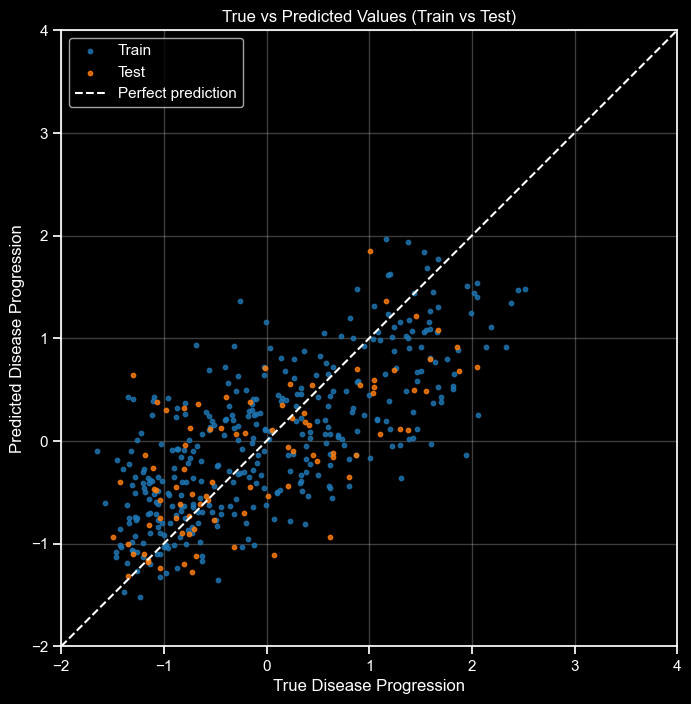

In [ ]:
# Scatter plot: True vs Predicted for train and test sets
plt.figure(figsize=(8, 8))
plt.scatter(y_tr, y_pred_analytic_tr, alpha=0.8, s=10, color="tab:blue", label="Train")
plt.scatter(y_te, y_pred_analytic_te, alpha=0.8, s=10, color="tab:orange", label="Test")

# Diagonal (perfect prediction) line and limits
_min = -2
_max = 4
plt.plot([_min, _max], [_min, _max], "w--", linewidth=1.5, label="Perfect prediction")

plt.xlabel("True Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("True vs Predicted Values (Train vs Test)")
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(_min, _max)
plt.ylim(_min, _max)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

## 💡 Interpretation of results

1. Points are tightly clustered along the dashed diagonal across the full range → overall a good predictive model.
2. Adding a few non-linear terms, of especially those features that have high variance, will narrow the cloud around the perfect line, i.e. make the prediction better. Note that we cannot afford to add too many new terms since there is only 442 samples. We will get into non-linear terms in future courses.

---


## 🧪 Testing the Model

For any machine learning model, we have a bunch of **Evaluation Metrics** that can tell us how the model is performing. We pass them the unseen test dataset and they will return a score. 📊

For linear regression, the common metrics are: 📏

1. **MSE (Mean Squared Error):** 🎯  
  Equation:  
  $$
  \text{MSE} = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2
  $$  
  Range and interpretation:  
  - Domain: [0, +∞)  
  - Lower is better; 0 indicates perfect predictions. ✅

2. **MAE (Mean Absolute Error):** 📐  
  Equation:  
  $$
  \text{MAE} = \frac{1}{N}\sum_{i=1}^{N}\lvert y_i - \hat{y}_i\rvert
  $$  
  Range and interpretation:  
  - Domain: [0, +∞)  
  - Lower is better; more robust to outliers than MSE. 💪

3. **R² (Coefficient of Determination):** 🏆  
  Equation (common form):  
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{N}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{N}(y_i - \bar{y})^2}
  $$  
  Range and interpretation:
  - Domain: [-∞, 1]  
  - 1 = perfect fit ⭐
  - 0 = model predicts no better than the mean 📊

In [ ]:
# Evaluate the already-trained model on the test set (and optionally train set for comparison)

# Metrics on test set
mse_te = mean_squared_error(y_te, y_pred_analytic_te)
mae_te = mean_absolute_error(y_te, y_pred_analytic_te)
r2_te = r2_score(y_te, y_pred_analytic_te)

# Metrics on train set (for comparison)
mse_tr = mean_squared_error(y_tr, y_pred_analytic_tr)
mae_tr = mean_absolute_error(y_tr, y_pred_analytic_tr)
r2_tr = r2_score(y_tr, y_pred_analytic_tr)

# Print results
print("=" * 60)
print("TEST SET PERFORMANCE")
print("=" * 60)
print(f"  MSE: {mse_te:.4f}")
print(f"  MAE: {mae_te:.4f}")
print(f"  R² : {r2_te:.4f}")

print("\n" + "=" * 60)
print("TRAIN SET PERFORMANCE (for comparison)")
print("=" * 60)
print(f"  MSE: {mse_tr:.4f}")
print(f"  MAE: {mae_tr:.4f}")
print(f"  R² : {r2_tr:.4f}")

# Optional: show a small table of actual vs predicted for the first 10 test samples
print("\nLast 10 test samples: Actual → Predicted")
for actual, pred in zip(y_te[-10:], y_pred_analytic_te[-10:]):
    print(f"  {actual:.3f} → {pred:.3f}")

TEST SET PERFORMANCE
  MSE: 0.4836
  MAE: 0.5561
  R² : 0.4575

TRAIN SET PERFORMANCE (for comparison)
  MSE: 0.4887
  MAE: 0.5676
  R² : 0.5220

Last 10 test samples: Actual → Predicted
  1.049 → 0.591
  -1.091 → -0.471
  0.491 → -0.196
  -0.728 → -1.274
  -1.039 → -1.242
  0.011 → -0.539
  -0.702 → -0.858
  -1.493 → -0.934
  -1.156 → -1.160
  0.413 → 0.150


## 💡 Interpretation of results


🏆 R² (test): This is the main goodness-of-fit signal. Closer to 1 is better.
- ✅ Our model's score on the test set is 0.46 which is in the reasonable/usable range (0.45–0.60)
    
📐 MSE/MAE (test): Because we re-normalized the target, these are in standard-deviation units of y.
- 🧮 RMSE = sqrt(MSE) ≈ typical error in “standard deviation of y”.
- 🎯 In our case, RMSE ≈ sqrt(0.48) ≈ 0.69 means predictions are, on average, ~0.69 standard deviations from the true value.
- 🤝 MAE is a more robust companion; MAE is typically ~0.8×RMSE for roughly Gaussian residuals.

🔁 Generalization check (train vs test):
- 🟩 Since R²_train = 0.52  and is comparable with R²_test = 0.46 and both are in acceptable range → the model generalizes well.

---

## 🔢 The numeric approach to training

So far, we used an analytic approach to training our linear regression. Unfortunately, such a solution does not exist for most of the models.
The practical approach is to numerically search for the minimum of the loss function.

One naive approach would be to randomly pick numerous set of values for the free parameters, insert them into the loss function to compute its values for each set. The set that results in the lowest loss function would be the optimal value. 🎲
The problem with this approach would be we might never randomly guess the optimal values of the parameters. 🤷‍♂️

### 📉 Gradient Descent

The systematic approach to finding the optimal values of free parameters that minimize the loss function is **Gradient Descent**.
In this method, we start by randomly selecting a point in the parameter space. Let’s call it $\tilde{\boldsymbol{\beta}}^{(0)}$, our initial guess for the parameters.

Then, we compute the gradient of the loss function, i.e. derivatives with respect to components of $\tilde{\beta}$ at that point:

$$
\boldsymbol{g}^{(0)} = \nabla \mathcal{L}(\tilde{\boldsymbol{\beta}}^{(0)})
$$

where $\mathcal{L}$ is our loss function in general. In this course, it is RSS.

Next, we update the values of the parameters by taking a step in the negative gradient direction: 👣

$$
\tilde{\boldsymbol{\beta}}^{(1)} = \tilde{\boldsymbol{\beta}}^{(0)} - \eta \boldsymbol{g}^{(0)}
$$

Here, $\eta$ is a small positive number called the learning rate. It controls how big a step we take.

We repeat this updating process: 🔄

$$
\tilde{\boldsymbol{\beta}}^{(k+1)} = \tilde{\boldsymbol{\beta}}^{(k)} - \eta \nabla \mathcal{L}(\tilde{\boldsymbol{\beta}}^{(k)})
$$

until the change in the loss function becomes negligible.

Eventually, we reach a point where the loss function stops decreasing significantly. At that point, we’ve found our optimal parameters. 🎯

This means we’ve trained our model *without ever solving the equations explicitly*. ✨

## Implementation of Gradient Descent

For most of well known machine learning models, we do not need to implement our own version of loss functions. Both the loss function and its minimization can be called from conventional libraries in just one short line (the .fit() method in scikit-learn for example). We saw it in course 1 and will use it in future courses.  

However, in the following, to better understand the concepts, we implement the loss function and its minimization.


In [ ]:
## Initialize beta_tilde with zeros (our guess for its values)
beta_tilde_gd = np.zeros(X_tilde_tr.shape[1])

## Set the hyperparameters
learning_rate = 0.001
n_epochs = 5000

## List to store RSS history as we update beta tilde values
rss_history = []

## Gradient Descent. Each epoch is an update step
for epoch in range(n_epochs):
    ## Compute predictions using the current (non-optimal) values of the beta parameters
    y_pred = X_tilde_tr @ beta_tilde_gd

    ## Compute residuals
    residuals = y_tilde - y_pred

    ## Compute RSS and store it
    current_rss = np.sum(residuals**2)
    rss_history.append(current_rss)

    ## Compute gradient of RSS: -2 * X.T * (y - X*beta)
    ## We divide by N to make the learning rate independent of the dataset size (Mean Squared Error gradient)
    N = len(y_tilde)
    gradient = -2 * X_tilde_tr.T @ residuals / N

    ## Update weights
    beta_tilde_gd = beta_tilde_gd - learning_rate * gradient


print("Final beta_tilde from Gradient Descent:")
print(beta_tilde_gd)



Final beta_tilde from Gradient Descent:
[-0.01063543  0.02484424 -0.1466549   0.3455678   0.21024559 -0.12282293
 -0.1569392   0.08287328  0.23985742  0.03348395]


## 📉 Visualize Loss Function Updates

Let's now see the improvement of the loss function (RSS in this course) after each update

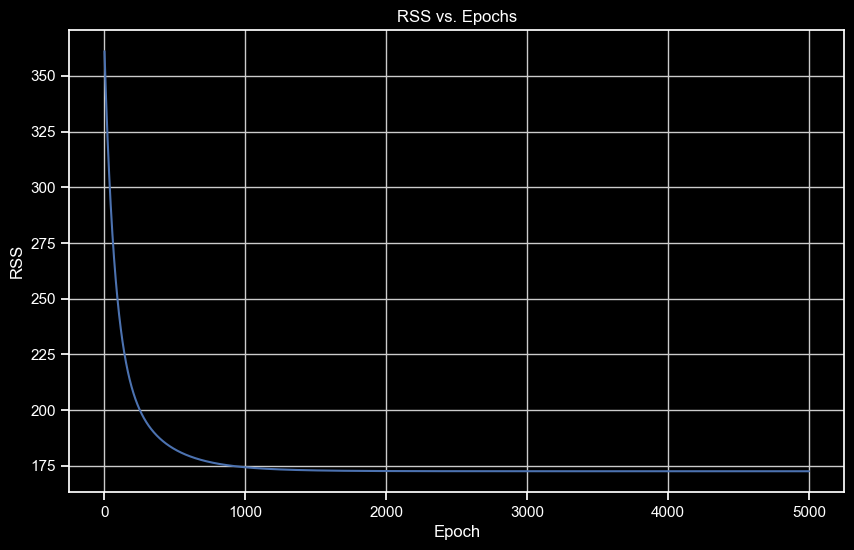

In [ ]:
## Plot RSS history
plt.figure(figsize=(10, 6))
plt.plot(rss_history)
plt.xlabel("Epoch")
plt.ylabel("RSS")
plt.title("RSS vs. Epochs")
plt.grid(True)
plt.show()

## 💡 Interpretation of Results

As you can see at the beginning RSS is very large. This means that our initial guess for the values of $\tilde{\beta}$ were not so good. Well that was expected.

However, the gradient of loss function guides us toward the optimal values of the parameters. And after 1000 steps (epochs), we reach the minimum. Afterward, the updates don't lower the loss function much.

The parameters that result in this minimum value of RSS would be the optimal values. And here is when we say the model is trained.

---

## ⚖️ Gradient Descent vs Analytical Approach

So far we have trained linear regression using two methods: 1. analytic 2. numeric.

Let's now compare the optimal values of parameter from both methods and see if we can notice any difference.

Index  Analytic     Gradient Descent   Difference  
--------------------------------------------------
0      -0.0106      -0.0106            0.0000      
1      0.0251       0.0248             0.0003      
2      -0.1469      -0.1467            0.0002      
3      0.3458       0.3456             0.0002      
4      0.2104       0.2102             0.0002      
5      -0.1247      -0.1228            0.0019      
6      -0.1550      -0.1569            0.0020      
7      0.0865       0.0829             0.0037      
8      0.2389       0.2399             0.0010      
9      0.0331       0.0335             0.0004      


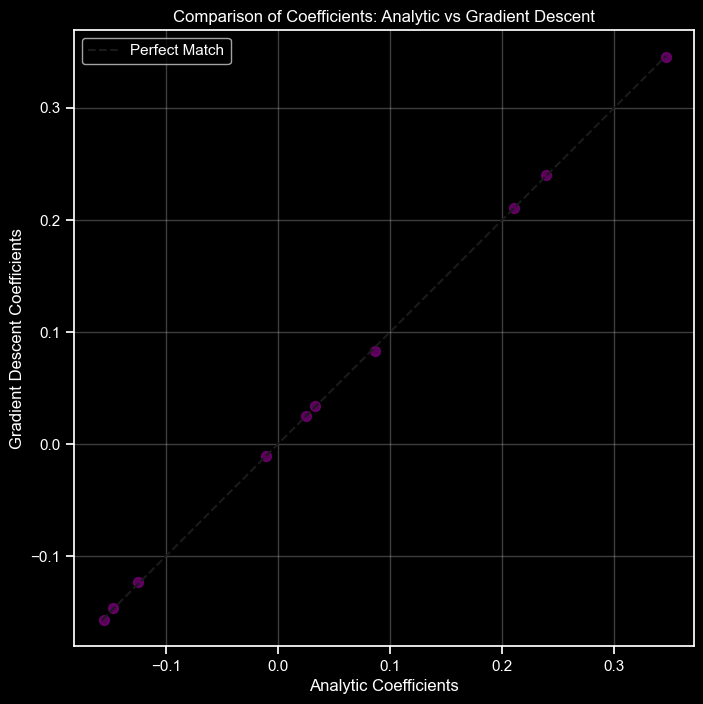

In [ ]:
## Compare the coefficients
print(f"{'Index':<6} {'Analytic':<12} {'Gradient Descent':<18} {'Difference':<12}")
print("-" * 50)
for i, (b_analytic, b_gd) in enumerate(zip(beta_tilde, beta_tilde_gd)):
    # Handle potential shape mismatch if beta_tilde is (N, 1) and beta_tilde_gd is (N,)
    val_analytic = b_analytic[0] if isinstance(b_analytic, (list, np.ndarray)) else b_analytic
    print(f"{i:<6} {val_analytic:<12.4f} {b_gd:<18.4f} {abs(val_analytic - b_gd):<12.4f}")

## Visual comparison
plt.figure(figsize=(8, 8))
# Flatten beta_tilde if it's 2D
beta_analytic_flat = beta_tilde.flatten() if hasattr(beta_tilde, 'flatten') else beta_tilde

plt.scatter(beta_analytic_flat, beta_tilde_gd, color='purple', s=50, alpha=0.7)

# Plot diagonal line
min_val = min(np.min(beta_analytic_flat), np.min(beta_tilde_gd))
max_val = max(np.max(beta_analytic_flat), np.max(beta_tilde_gd))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Match')

plt.xlabel('Analytic Coefficients')
plt.ylabel('Gradient Descent Coefficients')
plt.title('Comparison of Coefficients: Analytic vs Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

## 💡 Interpretation of Results

As you can see, the optimal values obtained through the numeric method are extremely close to those obtained from the analytic method (the most accurate).

Therefore, we can reliably use Gradient Descent (or its more advanced versions as we will see) in all our future courses.

---

##

In [ ]:
# @title
url = "https://compu-flair.com/notes/colab-ad/raw/"
MAKRDOWN = requests.get(url).text
display(Markdown(MAKRDOWN))

<div align="center">
      <img src="https://compu-flair.com/static/images/CompuFlairLogo.png" width="200">
</div>

## 🚀 Master Machine Learning
### 🎲 A Physics-inspired unified approach

🔗 Visit the program page: https://compu-flair.com/ml-for-physicists

👉 Here’s your roadmap: 
👣 Start from the top and move down, one row at a time:
1. 🚀 Take the Course on Google Colab.
2. 🎯 Run the Intermediate Project on Google Colab.
3. 🌟 Add complexities of professional setting to intermediate projects and prepare them for deployment:
    * Publish them on your GitHub and build your online presence.
    * Here is an [example advanced project](https://github.com/compu-flair/Kaggle_Advanced_House_Prices.git) ready for deployment.
    * In case you need help with an individual project, click "Get this Project Professionally SetUp"
4.  🎓 Want to learn it all & even more systematically? [Apply to our BootCamp](https://compu-flair.com/bootcamp)